# week5_hw 東元電機新聞文字探勘

In [1]:
import jieba
import pandas as pd
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import timedelta, date
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

## Load TECO's news 

In [3]:
# 專有名詞
jieba.load_userdict('ProperN.txt') 
#with open('ProperN.txt', 'rt',encoding="utf-8") as txt:
    #ProperN= txt.read()
#ProperN = ProperN.split("\n")
#for w in ProperN:
    #jieba.add_word(w)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/bf/kxrhqhkd3s1263kmtf84x8zw0000gn/T/jieba.cache
Loading model cost 0.839 seconds.
Prefix dict has been built succesfully.


In [4]:
# 停用詞
with open('StopWords.txt', 'rt',encoding="utf-8") as txt:
    stopword = txt.read()
stopword = stopword.split("\n")

In [5]:
# 讀取新聞檔案，並使用jieba切詞
def textMining(file):
    #open file
    with open("./News/" + file + ".txt", 'rt',encoding="utf-8") as txt:
        data = txt.read()
    #text segmentation
    seg_list = jieba.cut(data, cut_all=False)
    seg_list = list(seg_list)
    filter_list = []
    wordDict = {}
    jump = False
    for word in seg_list:
        for s in word:
            if not is_chinese(s):
                jump = True
                break
        if not jump:
            filter_list.append(word)
        jump = False
    return filter_list

In [6]:
# 設定新聞日期區間，儲存所有日期字串
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2017, 1, 6)
end_date = date(2018, 10, 1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y%m%d"))

In [7]:
# 依傳入日期去讀取新聞，該日有新聞則回傳切好詞的新聞字串，沒有值則回傳None
def get_join_list(file_date):
    try:
        filter_list = textMining(file_date)
        join_list = " ".join(filter_list)
        return join_list
    except:
        print("no news on " + file_date)

In [8]:
# 篩出有新聞的日期和其內容
corpus = []
news_dates = []
for date in dates:
    news = get_join_list(date)
    if news != None:
        print("append news of date " + date)
        news_dates.append(date)
        corpus.append(news)

append news of date 20170106
no news on 20170107
no news on 20170108
append news of date 20170109
no news on 20170110
no news on 20170111
no news on 20170112
no news on 20170113
no news on 20170114
no news on 20170115
no news on 20170116
no news on 20170117
no news on 20170118
no news on 20170119
no news on 20170120
no news on 20170121
no news on 20170122
no news on 20170123
no news on 20170124
append news of date 20170125
append news of date 20170126
append news of date 20170127
no news on 20170128
no news on 20170129
no news on 20170130
no news on 20170131
no news on 20170201
no news on 20170202
no news on 20170203
no news on 20170204
no news on 20170205
no news on 20170206
no news on 20170207
no news on 20170208
no news on 20170209
no news on 20170210
no news on 20170211
no news on 20170212
no news on 20170213
no news on 20170214
no news on 20170215
no news on 20170216
append news of date 20170217
no news on 20170218
no news on 20170219
no news on 20170220
append news of date 201702

append news of date 20180515
append news of date 20180516
no news on 20180517
no news on 20180518
no news on 20180519
no news on 20180520
append news of date 20180521
no news on 20180522
no news on 20180523
no news on 20180524
append news of date 20180525
no news on 20180526
no news on 20180527
append news of date 20180528
append news of date 20180529
append news of date 20180530
no news on 20180531
no news on 20180601
no news on 20180602
no news on 20180603
no news on 20180604
no news on 20180605
no news on 20180606
no news on 20180607
no news on 20180608
no news on 20180609
no news on 20180610
no news on 20180611
no news on 20180612
no news on 20180613
no news on 20180614
append news of date 20180615
no news on 20180616
no news on 20180617
no news on 20180618
append news of date 20180619
no news on 20180620
no news on 20180621
no news on 20180622
no news on 20180623
no news on 20180624
no news on 20180625
no news on 20180626
no news on 20180627
append news of date 20180628
append new

In [9]:
# 確認新聞內容
print(corpus[0])
len(corpus)

東元 集團 旗下 台灣宅 配通 擬漲 運費 東元 集團 董事長 邱純枝 昨 日 表示 一例一休 後 東元 不 休假 獎金 多增 千萬至 千萬元 最大 問題 是 生產線 員工 工作 無法 在 淡旺季 調 節 但 負責 物流配送 的 台灣宅 配通 人員 採輪班 不單 周末 假日 過年 期間 仍 得 配送 得 要付 加班 費 人事 成本增加 不少 正 醞釀 調漲 運 費 但 每件 運費 增幅 將不超過 顆 滷 蛋 價 格 東元 集團 旗下 事業 涵蓋 生產 製造 資通訊 服務及 餐 飲 等 不同 領域 受 一例一休 影響 程度 不同 邱純枝 昨天 主持 東元家電 年 新產品 發表會 後 受訪 表示 東元過 去 周末 加班 費都 優 於 勞基法 規定 一例 一 休後受 影響 程度 不 大 但 因 一例一休 新增 不 休假 獎金 未 休假 要 支付 代金 費用 每年 多 增加 千萬至 千萬元 對 東元來 說 比較 大 問題 出 在家 電有 淡旺季 之分 人力 可 在 旺季 做調 配 一例一休 沒有 雇主 與 員工 協商 淡旺季 補 休假 彈性 家電 旺季 屬 於 短期 性 人力 需求 會以 短期 契約工 或 派遣 工 支援 機電及 馬達 技術 層次 較 高 付 加班 費還 不如 增加 正職 員工 反映 成本增加 部分 家電 調漲 東元家電 去年 家電內外 銷業績 超過 億元 今年 有 了 新產品 加入 商 用空 調還 打算 拓銷 菲律賓 越南 及 印尼 等 地 市場 預計 成長 東 元 今年 家電內外 銷業績 計畫 成長 突破 百億元 但 為 反映 鋼鐵 銅及 鋁等 原材料 價格 調漲 人工成本 增加 產品 功能 優質化 邱純枝 表示 東元 今年 家用 及 商用 變頻 空調 平均 上漲 冰箱 及 洗衣 機 平均 調漲 董座 留好 員工 加薪 不會 縮水 身兼 台灣宅 配通 董事長 的 邱純枝 指出 東元 員工 加薪 不 受 一例一休 影 響 不 加薪 找 不到 好 員工 市場 機制 企業 若 不 調薪 會 造成 好 的 人 才 都 被 挖角 東元過 去 幾年 每年 全 公司 平均 調薪 幅度 至 基 層 優秀 員工 薪資 調幅 超過 東元 配合 政府 節能 政策 積極 推 高效能 馬達 去年 月 獲 經濟部 頒發 千萬元 補助 年 獲 利比 接近 兩位 數成長 今年 發放年 

99

## TF-IDF 

In [10]:
# tfidf
vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 0.1)
tfidf = vectorizer.fit_transform(corpus)

In [11]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  358


In [12]:
weight = tfidf.T.toarray()
print(len(weight))
weight[:1]

358


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06086723, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0251314 , 0.        , 0.        , 0.        , 0.08375873,
        0.        , 0.        , 0.09102401, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05483174, 0.04811592, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06223229, 0.        , 0.        , 0.        , 0.        ,
        0.11408066, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [14]:
print("tfidf.shape: ", tfidf.shape)

tfidf.shape:  (99, 358)


#### * 高權重的 TF-IDF 取決於特定文件內的高詞頻，及該詞語跨文件的低文件出現率 (high term frequency in the given document and a low document frequency of the term in the whole collection of documents)。

In [15]:
# check each document
for i in range(len(corpus)):
    print('----{0} NEWS----'.format(news_dates[i]))
    for j in range(len(words)):
        if tfidf[i,j] > 0.2:
              print(words[j], tfidf[i,j], i ,j)

----20170106 NEWS----
家電 0.21173603407380207 0 107
東元電機 0.3349411484687436 0 191
邱純枝 0.2115745642340389 0 322
配通 0.2280444820603896 0 325
----20170109 NEWS----
推出 0.21082876881804066 1 155
變頻 0.7510018020156406 1 301
----20170125 NEWS----
今年 0.27500602681590003 2 19
優勢 0.30106245291155137 2 32
去年 0.24083947530798405 2 62
可能 0.29837569909331 2 71
----20170126 NEWS----
今年 0.3489737032519916 3 19
以上 0.20205364557263703 3 22
億元 0.20226643189478535 3 31
去年 0.32089833371523113 3 62
受到 0.2210142516145778 3 67
持股 0.2210142516145778 3 149
股東 0.2871262307876034 3 270
過去 0.2736114211160356 3 318
----20170127 NEWS----
智慧 0.5569938831755078 4 183
機械 0.5263663835127259 4 199
產業 0.2054587958619545 4 227
----20170217 NEWS----
以及 0.22459190597934506 5 23
企業 0.22459190597934506 5 24
未來 0.2531197373778938 5 189
業務 0.27245575770584285 5 194
穩定 0.6945809335888274 5 243
----20170221 NEWS----
去年 0.3316061067570991 6 62
客戶 0.20377685986204958 6 103
智慧 0.5108956455531972 6 183
物流 0.20541317780387178 6 216
管理系 

成長 0.3170387582740563 48 142
明年 0.3879630451237366 48 179
突破 0.31032992218079275 48 246
邱純枝 0.25323228590795205 48 322
----20171107 NEWS----
人才 0.2214516829009083 49 17
環境 0.2755719821870309 49 222
科技 0.5207765150992293 49 241
領域 0.23177669002708404 49 351
----20171114 NEWS----
億元 0.2860292448820147 50 31
太陽能 0.23378238315043876 50 98
綠能 0.5207892318407662 50 264
開發 0.2408580859517668 50 330
----20171115 NEWS----
太陽能 0.24617829732720375 51 98
綠能 0.49508621966419325 51 264
規劃 0.20514858110600312 51 290
開發 0.2926490506884028 51 330
電廠 0.24057959537103882 51 343
----20171120 NEWS----
全台 0.3294027723690794 52 33
冷氣 0.6588055447381588 52 43
家電 0.20389716954687334 52 107
政府 0.21945763802933776 52 165
用電 0.22572564483684565 52 230
----20171127 NEWS----
業務 0.2516140634842203 53 194
比重 0.33812999534963345 53 205
法人 0.2817749961246945 53 207
營收 0.20741159065590592 53 213
配通 0.5783870944972883 53 325
----20171204 NEWS----
中心 0.20924395722866632 54 11
企業 0.38585845704692534 54 24
節省 0.207376613773

#### * TF-IDF Matrix 

In [16]:
df = pd.DataFrame(weight, index = words, columns = news_dates)
df

,20170106,20170109,20170125,20170126,20170127,20170217,20170221,20170321,20170328,20170415,...,20180705,20180709,20180712,20180718,20180801,20180813,20180822,20180911,20180927,20180928
一年,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
一步,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080619
上半年,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.351080,0.000000,0.423442,0.000000,0.058127,0.000000,0.000000
上市,0.000000,0.000000,0.000000,0.070032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053756,0.000000,0.000000
下半年,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055099,0.000000,0.000000
不但,0.000000,0.068273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.025601,0.000000,0.000000,0.055099,0.000000,0.000000
不僅,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046638,0.078823
不同,0.129640,0.000000,0.000000,0.000000,0.000000,0.000000,0.056803,0.000000,0.000000,0.103370,...,0.000000,0.000000,0.000000,0.000000,0.044811,0.000000,0.000000,0.000000,0.000000,0.000000
並且,0.000000,0.066609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
中壢廠,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063323,0.000000,0.057931,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Cosine Similarity
* 計算新聞間的餘弦相似性，並列出相似性 >0.8 的兩篇新聞

In [17]:
similarity = cosine_similarity(tfidf, tfidf)
type(similarity)

numpy.ndarray

In [18]:
similar_news_index = []
news_index = 0
for index1 in range(len(similarity)):
    news_index += 1
    for index2 in range(news_index, len(similarity[index1])):
        if 0.8 < similarity[index1][index2] < 0.99:
            similar_news_index.append((index1, index2))

In [19]:
for i in similar_news_index:
    print("====================================")
    print(news_dates[i[0]] + "\n", corpus[i[0]])
    print(news_dates[i[1]] + "\n", corpus[i[1]])

20170720
 年 月 日 工商 沈 美幸 東元 集團 布局 東南亞及 印度 市場 多年 有 成 首款 特種 五人座 電動 三輪車 已 獲菲律賓 交通部 口頭 許可 預計 今年 可 在 菲律賓 開賣 目前 已有 不少 約定 買家 在 印度 設廠 生產小 馬達 廠 今年 預計 生產 萬台 經濟部 委 託 外貿 協會 邀訪 馬 來 西亞 等 五國 媒體團 特別 安排 參訪 東元電機 東元電機 主管 指出 包括 馬 來 西亞 泰國 印尼 印度 菲律 賓五國 的 綠色 產業 媒體 這次 採訪 過程 對 於 東元電機 生產 的 五人座 特種 電動 三輪車 表達 興趣 提出 不少 問題 東元 這輛 特種 電動 三輪車 是 針對 東南亞 市場 打造 不僅 純電動 零排放 而且 考慮 東南亞午 後 大雨 容易 淹水 機電系統 防水 防塵 等級 提升 至 滿載 時極速 可上 達 續航 可達 能 輕 鬆 駕 馭 高 達 的 山路 坡度 不但 與 主流 道路 車輛 匹 敵 也 切合 東南亞 的 山坡 地形 去年底 在 蘇 比克 灣 第一批 量產 後 主要 先 搶 攻菲律賓 市場 強調 取代 當地 慣用 的 柴油 車 解決 嚴重 的 廢氣 汙染 問題 更能 為 車主節 省 的 動力 費用 東元電機 主管 表示 東元電機 在 南向 國家 的 投資 佈 局 深耕 多年 在 馬 來 西亞 泰國 印尼 印度 菲律賓 等國 都 有生 產 或 銷售 據點 去年 在 印度 設立 東元 在 當地 的 第一 個 小 馬達 工廠 今年初 全面 量產 預計 可以 達到 全年 五萬台 的 產量 身為 全球化 經營 集團 東元 積極 培育 南向 國家 人才 包括 來 自 越南 印度 印尼 甚至 非洲 的 頂 尖學府 實習生 先派 到 東元 台灣 總 公司 見習 研發 或 生產技術 銷售 等 未來 可能 被 派 駐 到 當地 成為 東元 深耕 南向 市場 的 人才 庫 工商
20170724
 年 月 日 工商 時報 陳逸格 經濟部 委 託 外貿 協會 邀請 新 南向 國家 國媒體 於 月 日 日來 台 訪問 媒體 團特別 前往 東元電機 參訪 東元電機 除了 展示 去年底 開始 在 菲律 賓蘇 比克 灣量 產 的 人座 電動 三輪車 之外 並且 表示 在 印度 投資 設廠 的 小 馬達 生產 今年 將達 到 年

In [43]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

In [64]:
X = tfidf.toarray()

In [65]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.04373228,  0.09591582],
       [ 0.07320069, -0.14036099],
       [-0.11237244, -0.00404622],
       [-0.24860596,  0.12516445],
       [ 0.12263615, -0.10796044],
       [-0.06824681,  0.05015811],
       [ 0.16808122,  0.10000063],
       [-0.03314693, -0.22308085],
       [-0.2878802 , -0.31718106],
       [ 0.00793569, -0.17976094],
       [ 0.20952589, -0.20642375],
       [ 0.32784931, -0.05711821],
       [ 0.3625348 ,  0.13806497],
       [-0.199249  , -0.19314849],
       [-0.15604673,  0.01758025],
       [-0.07912619,  0.01122859],
       [ 0.13722345,  0.04484916],
       [-0.28099551, -0.13001176],
       [-0.11205924, -0.13881397],
       [ 0.33788607,  0.31178324],
       [ 0.03631657,  0.42913896],
       [ 0.42211482,  0.13789485],
       [ 0.4655951 , -0.00057088],
       [ 0.39187266, -0.04877642],
       [-0.40457488,  0.05788749],
       [ 0.03527836,  0.12996861],
       [-0.19695705, -0.3462649 ],
       [-0.23836662, -0.33822495],
       [-0.11391798,

No handles with labels found to put in legend.


99
99


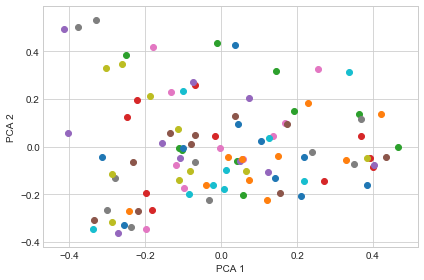

In [71]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    print(len(news_dates))
    print(len(Y_sklearn))
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])#, label = news_dates[i])
    
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [68]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMEANS(n_clusters = 3)

X_cluster = kmeans.fit_predict()